# Project Start

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA_Analysis
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
Label_Encoder = LabelEncoder()
from sklearn import metrics

In [ ]:
url = "/content/yield_df.csv"

dataset = pd.read_csv(url)

In [ ]:
dataset.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
1,11,Albania,Wheat,1991,20698,1485.0,121.0,15.36
2,17,Albania,Wheat,1992,24388,1485.0,121.0,16.06
3,22,Albania,Wheat,1993,29976,1485.0,121.0,16.05
4,26,Albania,Wheat,1994,24745,1485.0,201.0,16.96


In [ ]:
dataset['hg/ha_yield'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       30197
1       20698
2       24388
3       29976
4       24745
        ...  
3852    30000
3853    27681
3854    26274
3855    24420
3856    22888
Name: hg/ha_yield, Length: 3857, dtype: int64>

In [ ]:
dataset = dataset.fillna({
    'Year':1995,
    'hg/ha_yield':30197,
    'average_rain_fall_mm_per_year':1485.0,
    'pesticides_tonnes':121.0,
    'avg_temp':16.37
})

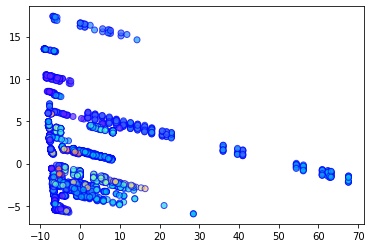

In [ ]:

X = dataset.iloc[:, 5:8].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lda = LDA_Analysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

plt.scatter(
    X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)
  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
  
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

Accuracy : 0.025906735751295335
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
y_pred

array([19699, 19699, 18209, 19699, 18209, 25590, 18209, 27621, 27621,
       44871, 27621, 44871, 19488, 18209, 18209, 18209, 19488, 18209,
       18209, 18209, 27621, 18209, 18209, 27621, 25590, 18209, 44871,
       27621, 18209, 19488, 27621, 26789, 27621, 18209, 27621, 18209,
       18209, 27621, 27621, 27621, 44871, 19488, 44871, 18209, 26789,
       27621, 18209, 18209, 18209, 18209, 18209, 27621, 18209, 18209,
       27621, 18209, 18209, 27621, 18209, 18209, 27621, 44871, 18209,
       22199, 18209, 18209, 26789, 18209, 27621, 18209, 28288, 18209,
       27621, 27621, 27621, 27621, 18209, 27621, 26789, 18209, 18209,
       27621, 44871, 18209, 18209, 18209, 27621, 18209, 27621, 18209,
       18209, 27621, 27621, 18209, 27621, 44871, 27621, 18209, 18209,
       18209, 44871, 18209, 27621, 18209, 27621, 27621, 18209, 27621,
       18209, 18209, 18209, 18209, 18209, 18209, 18209, 19699, 18209,
       27621, 27621, 18209, 18209, 18209, 18209, 44871, 27621, 27621,
       44871, 18209,

In [ ]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ',math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  12334.757772020725
Mean Squared Error:  332889894.05569947
Root Mean Squared Error:  18245.270457181487


#Graphs




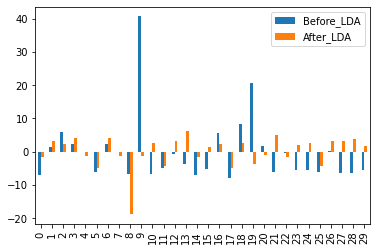

In [ ]:
LDA_graph = pd.DataFrame({'Before_LDA':X_train[:,0].flatten(),'After_LDA':X_train[:,1].flatten()})


LDA_graph = LDA_graph.head(30)
LDA_graph.plot(kind='bar')

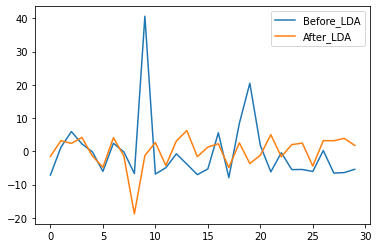

In [ ]:
LDA_graph_line = pd.DataFrame({'Before_LDA':X_train[:,0].flatten(),'After_LDA':X_train[:,1].flatten()})


LDA_graph_line = LDA_graph_line.head(30)
LDA_graph_line.plot(kind='line')